# 0. Install and Import Dependencies

In [ ]:
!pip install -r ../requirements.txt

### Download the pose_landmarker models from [here](https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker) and place it in a folder called "mediapipe_models" in the main directory.

In [1]:
import cv2
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import numpy as np


In [2]:
# VIDEO FEED
cap = cv2.VideoCapture(0)  # replace with 1 for secondary/external camera
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Visualization utilities

In [12]:
def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

# Create the task

In [ ]:
model_path = '../mediapipe_models/pose_landmarker_heavy.task'

In [35]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
PoseLandmarkerResult = mp.tasks.vision.PoseLandmarkerResult
VisionRunningMode = mp.tasks.vision.RunningMode

# Create a pose landmarker instance with the live stream mode:
def print_result(result: PoseLandmarkerResult, output_image: mp.Image, timestamp_ms: int):
    print('pose landmarker result: {}'.format(result))

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.IMAGE)
    # result_callback=print_result)

full configuration options [here](https://ai.google.dev/edge/mediapipe/solutions/vision/pose_landmarker/python#configuration_options)
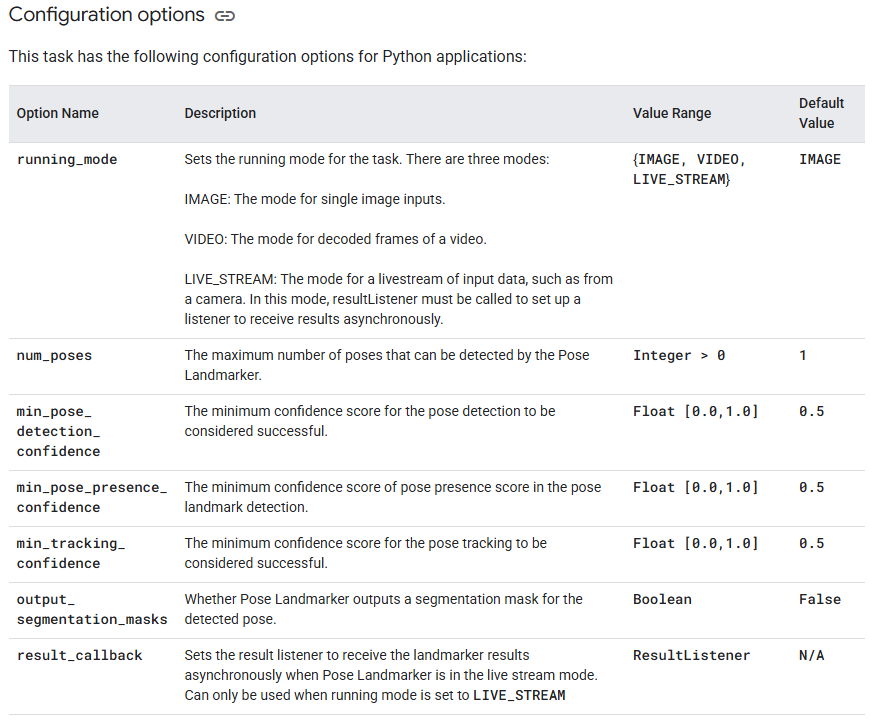

In [36]:
cap = cv2.VideoCapture(0)

with PoseLandmarker.create_from_options(options) as landmarker:
    timestamp = 0
    while cap.isOpened():
        timestamp += 1 
        ret, frame = cap.read()

        # Convert the frame received from OpenCV to a MediaPipe’s Image object.
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)

        # STEP 4: Detect pose landmarks from the input image.
        detection_result = landmarker.detect(mp_image)

        # STEP 5: Process the detection result. In this case, visualize it.
        annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)
        cv2.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
        # # Send live image data to perform pose landmarking.
        # detection_result = landmarker.detect_async(mp_image, timestamp)

        # # STEP 5: Process the detection result. In this case, visualize it.
        # # annotated_image = draw_landmarks_on_image(mp_image, detection_result)
        # # cv2.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
        cv2.imshow('Mediapipe Feed', frame)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



c:\Users\SESA695980\Documents\workspace\Fitness_app\.venv\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [30]:
PoseLandmarkerResult.Landmarks

AttributeError: type object 'PoseLandmarkerResult' has no attribute 'Landmarks'